In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:

df = pd.read_csv("data/income_distribution/200_Company_details/company.csv")
df


,Unnamed: 0,name,rating,ctype
0,0,TCS,3.8,IT Services & Consulting | 1 Lakh+ Employees |...
1,1,Accenture,4.0,IT Services & Consulting | 1 Lakh+ Employees |...
2,2,Cognizant,3.9,IT Services & Consulting | 1 Lakh+ Employees |...
3,3,Wipro,3.8,IT Services & Consulting | 1 Lakh+ Employees |...
4,4,Capgemini,3.9,IT Services & Consulting | 1 Lakh+ Employees |...
...,...,...,...,...
195,195,Atos,3.8,IT Services & Consulting | 10k-50k Employees |...
196,196,Aakash Educational Services,3.6,EdTech | 5k-10k Employees | 36 years old | New...
197,197,DCB Bank,3.9,Banking | 5k-10k Employees | Fortune India 500...
198,198,Hindustan Coca Cola Beverages,4.3,Beverage | 5k-10k Employees | 27 years old | B...


In [ ]:
# ιατί η ctype δεν πρέπει να χρησιμοποιηθεί όπως είναι
df.groupby("ctype")["rating"].mean()


ctype
Analytics & KPO | 10k-50k Employees | 25 years old | New York City +45 more              3.8
Auto Components | 1k-5k Employees | Public | 38 years old | Noida +79 more               3.8
Auto Components | 1k-5k Employees | Public | 39 years old | Noida +57 more               4.0
Auto Components | 1k-5k Employees | Public | 41 years old | Gurgaon/Gurugram +87 more    4.0
Auto Components | 5k-10k Employees | Public | 138 years old | Gerlingen +100 more        4.3
                                                                                        ... 
Telecom | 10k-50k Employees | Public | 29 years old | Gurgaon/Gurugram +651 more         4.1
Telecom | 201-500 Employees | Public | 22 years old | Navi Mumbai +424 more              4.0
Telecom | 50k-1 Lakh Employees | Public | 17 years old | Navi Mumbai +1170 more          4.0
Telecom | 5k-10k Employees | Public | 38 years old | Mumbai +90 more                     4.2
Telecom | 5k-10k Employees | Public | 6 years old | Mumbai +638 

In [7]:
"""
Τι ΠΡΕΠΕΙ να κάνεις: αποσύνθεση (feature extraction)

Από τη ctype πρέπει να παραχθούν ΝΕΕΣ στήλες.

Ελάχιστο σωστό decomposition (4 νέες στήλες)

| Νέα στήλη      | Τι περιέχει        | Τύπος                     |
| -------------- | ------------------ | ------------------------- |
| `industry`     | Κλάδος             | categorical               |
| `company_size` | bucket εργαζομένων | ordinal categorical       |
| `company_age`  | ηλικία (έτη)       | numeric                   |
| `labels`       | Fortune / rankings | categorical (multi-label) |


"""

'\nΤι ΠΡΕΠΕΙ να κάνεις: αποσύνθεση (feature extraction)\n\nΑπό τη ctype πρέπει να παραχθούν ΝΕΕΣ στήλες.\n\nΕλάχιστο σωστό decomposition (4 νέες στήλες)\n\n| Νέα στήλη      | Τι περιέχει        | Τύπος                     |\n| -------------- | ------------------ | ------------------------- |\n| `industry`     | Κλάδος             | categorical               |\n| `company_size` | bucket εργαζομένων | ordinal categorical       |\n| `company_age`  | ηλικία (έτη)       | numeric                   |\n| `labels`       | Fortune / rankings | categorical (multi-label) |\n\n\n'

In [9]:
# Αφαίρεσε το άχρηστο Unnamed: 0
# df = df.drop(columns=["Unnamed: 0"])


In [10]:
# Σπάσε το ctype με βάση το |
ctype_split = df["ctype"].str.split("|", expand=True)

ctype_split.head()


,0,1,2,3,4
0,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai +339 more
1,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin +172 more
2,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey. +156 more
3,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru +276 more
4,IT Services & Consulting,1 Lakh+ Employees,Public,57 years old,Paris +139 more


In [11]:
# Δημιούργησε καθαρές στήλες
df["industry"] = ctype_split[0].str.strip()
df["company_size"] = ctype_split[1].str.strip()
df["company_age_raw"] = ctype_split[2].str.strip()
df["labels"] = ctype_split[3].str.strip()


In [34]:
# Καθάρισμα ηλικίας
df["labels"]

0             56 years old
1             35 years old
2             30 years old
3             79 years old
4             57 years old
              ...         
195           27 years old
196    New Delhi +203 more
197           94 years old
198    Bangalore +216 more
199    New Delhi +111 more
Name: labels, Length: 200, dtype: object

In [45]:
#  Θέλουμε αριθμό
# df["company_age"] = (
#     df["labels"]
#       .str.extract(r"(\d+)")
#       .astype(float)
# )

df["company_age"] = (
    df["ctype"]
      .str.extract(r"(\d+)\s+years\s+old", expand=False)
      .astype(float)
)
# μετατροπη  σε  ακεραιο 
df["company_age"] = df["company_age"].astype("Int64")



KeyError: 'ctype'

In [46]:
df.head(10)


,name,rating,industry,company_size,company_age,company_size_cat
0,TCS,3.8,IT Services & Consulting,1 Lakh+ Employees,56.0,100k_plus
1,Accenture,4.0,IT Services & Consulting,1 Lakh+ Employees,35.0,100k_plus
2,Cognizant,3.9,IT Services & Consulting,1 Lakh+ Employees,30.0,100k_plus
3,Wipro,3.8,IT Services & Consulting,1 Lakh+ Employees,79.0,100k_plus
4,Capgemini,3.9,IT Services & Consulting,1 Lakh+ Employees,57.0,100k_plus
5,HDFC Bank,3.9,Banking,1 Lakh+ Employees,30.0,100k_plus
6,ICICI Bank,4.0,Banking,1 Lakh+ Employees,30.0,100k_plus
7,Infosys,3.8,IT Services & Consulting,1 Lakh+ Employees,43.0,100k_plus
8,HCLTech,3.7,IT Services & Consulting,1 Lakh+ Employees,33.0,100k_plus
9,Tech Mahindra,3.7,IT Services & Consulting,1 Lakh+ Employees,38.0,100k_plus


In [36]:
# Διάλεξε ρητά τις στήλες που κρατάς

analysis_cols = [
    "name",
    "rating",
    "industry",
    "company_size",
    "company_age",
]

df_clean = df[analysis_cols].copy()

df_clean

,name,rating,industry,company_size,company_age
0,TCS,3.8,IT Services & Consulting,1 Lakh+ Employees,56
1,Accenture,4.0,IT Services & Consulting,1 Lakh+ Employees,35
2,Cognizant,3.9,IT Services & Consulting,1 Lakh+ Employees,30
3,Wipro,3.8,IT Services & Consulting,1 Lakh+ Employees,79
4,Capgemini,3.9,IT Services & Consulting,1 Lakh+ Employees,57
...,...,...,...,...,...
195,Atos,3.8,IT Services & Consulting,10k-50k Employees,27
196,Aakash Educational Services,3.6,EdTech,5k-10k Employees,36
197,DCB Bank,3.9,Banking,5k-10k Employees,94
198,Hindustan Coca Cola Beverages,4.3,Beverage,5k-10k Employees,27


In [38]:
# Τελικός έλεγχος
df_clean.info()
df_clean.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          200 non-null    object 
 1   rating        200 non-null    float64
 2   industry      200 non-null    object 
 3   company_size  200 non-null    object 
 4   company_age   199 non-null    Int64  
dtypes: Int64(1), float64(1), object(3)
memory usage: 8.1+ KB


,name,rating,industry,company_size,company_age
0,TCS,3.8,IT Services & Consulting,1 Lakh+ Employees,56
1,Accenture,4.0,IT Services & Consulting,1 Lakh+ Employees,35
2,Cognizant,3.9,IT Services & Consulting,1 Lakh+ Employees,30
3,Wipro,3.8,IT Services & Consulting,1 Lakh+ Employees,79
4,Capgemini,3.9,IT Services & Consulting,1 Lakh+ Employees,57


In [48]:
def normalize_size(size):
    # Κανονικοποίηση σε buckets (ασφαλές)
    if pd.isna(size):
        return None
    size = size.lower()
    if "lakh" in size:
        return "100k_plus"
    if "10k-50k" in size:
        return "10k_50k"
    if "5k-10k" in size:
        return "5k_10k"
    return "other"

df_clean["company_size_cat"] = df_clean["company_size"].apply(normalize_size)


In [49]:
def size_lower_bound(size):
    if pd.isna(size):
        return None
    size = size.lower()
    if "lakh" in size:
        return 100_000
    if "10k-50k" in size:
        return 10_000
    if "5k-10k" in size:
        return 5_000
    return None

df_clean["company_size_min"] = df_clean["company_size"].apply(size_lower_bound)


In [53]:
df_clean.to_csv(
    "data/income_distribution/200_Company_details/companies_clean.csv",
    index=False,
    encoding="utf-8"
)


In [54]:

df = pd.read_csv("data/income_distribution/200_Company_details/companies_clean.csv")
df


,name,rating,industry,company_size,company_age,company_size_cat,company_size_min
0,TCS,3.8,IT Services & Consulting,1 Lakh+ Employees,56.0,100k_plus,100000.0
1,Accenture,4.0,IT Services & Consulting,1 Lakh+ Employees,35.0,100k_plus,100000.0
2,Cognizant,3.9,IT Services & Consulting,1 Lakh+ Employees,30.0,100k_plus,100000.0
3,Wipro,3.8,IT Services & Consulting,1 Lakh+ Employees,79.0,100k_plus,100000.0
4,Capgemini,3.9,IT Services & Consulting,1 Lakh+ Employees,57.0,100k_plus,100000.0
...,...,...,...,...,...,...,...
195,Atos,3.8,IT Services & Consulting,10k-50k Employees,27.0,10k_50k,10000.0
196,Aakash Educational Services,3.6,EdTech,5k-10k Employees,36.0,5k_10k,5000.0
197,DCB Bank,3.9,Banking,5k-10k Employees,94.0,5k_10k,5000.0
198,Hindustan Coca Cola Beverages,4.3,Beverage,5k-10k Employees,27.0,5k_10k,5000.0


In [55]:
summary = (
    df_clean
      .groupby("company_size_cat")["rating"]
      .agg(["count", "mean", "median", "std"])
      .sort_index()
)

summary


,count,mean,median,std
company_size_cat,,,,
100k_plus,36,3.950000,3.90,0.243193
10k_50k,110,3.986364,4.05,0.267327
5k_10k,35,4.068571,4.10,0.244674
other,19,4.047368,4.00,0.271556


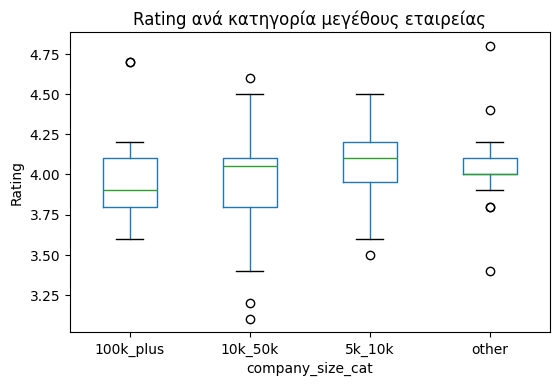

In [56]:
df_clean.boxplot(
    column="rating",
    by="company_size_cat",
    grid=False,
    figsize=(6,4)
)

plt.title("Rating ανά κατηγορία μεγέθους εταιρείας")
plt.suptitle("")
plt.ylabel("Rating")
plt.show()

In [57]:
from scipy.stats import kruskal

groups = [
    g["rating"].dropna().values
    for _, g in df_clean.groupby("company_size_cat")
]

stat, p_value = kruskal(*groups)

stat, p_value


(np.float64(9.65339347994726), np.float64(0.021754277215462275))

In [62]:
print("p_value == 0.05 ?", p_value == 0.05)
print(" p_value >= 0.05 ?", p_value >= 0.05)
print("0.p_value <= 0.05 ?", p_value <= 0.05)

p_value == 0.05 ? False
 p_value >= 0.05 ? False
0.p_value <= 0.05 ? True


In [63]:
# Κώδικας Dunn test με διόρθωση Bonferroni
import scikit_posthocs as sp

dunn = sp.posthoc_dunn(
    df_clean,
    val_col="rating",
    group_col="company_size_cat",
    p_adjust="bonferroni"
)

dunn


,100k_plus,10k_50k,5k_10k,other
100k_plus,1.000000,0.422418,0.012337,0.699048
10k_50k,0.422418,1.000000,0.286421,1.000000
5k_10k,0.012337,0.286421,1.000000,1.000000
other,0.699048,1.000000,1.000000,1.000000


In [67]:
# Effect size για Kruskal–Wallis
H = 9.65339347994726   # από το test σου
k = df_clean["company_size_cat"].nunique()
n = len(df_clean)

epsilon_sq = (H - k + 1) / (n - k)
epsilon_sq


0.03394588510177173

In [68]:
print(epsilon_sq < 0.01, "= αμελητέο ?")
print(0.01< epsilon_sq <0.06, "= μικρό ?")
print(0.06 < epsilon_sq <  0.14, "= μέτριο ?")
print(epsilon_sq >  0.14, "= μεγάλο ?")

False = αμελητέο ?
True = μικρό ?
False = μέτριο ?
False = μεγάλο ?


In [75]:
df_age = df_clean.dropna(subset=["company_age"])


In [71]:
df_age[["company_age", "rating"]].describe()


,company_age,rating
count,199.0,199.000000
mean,46.809045,3.998995
std,40.760618,0.261115
min,4.0,3.100000
25%,23.0,3.800000
50%,33.0,4.000000
75%,56.0,4.100000
max,218.0,4.800000


In [72]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(
    df_age["company_age"],
    df_age["rating"]
)

rho, p_value


(np.float64(0.2607669351201895), np.float64(0.00019925055995830872))

In [80]:
print(" p_value >= 0.05 ?", p_value >= 0.05)
print("p_value <= 0.05 ?", p_value <= 0.05)

 p_value >= 0.05 ? False
p_value <= 0.05 ? True


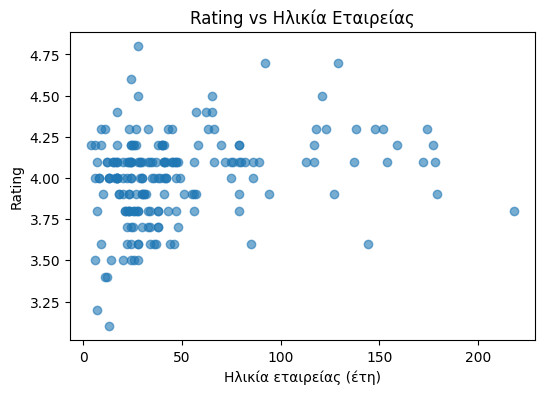

In [77]:
# Scatter plot (βάση για spline)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(
    df_age["company_age"],
    df_age["rating"],
    alpha=0.6
)

plt.xlabel("Ηλικία εταιρείας (έτη)")
plt.ylabel("Rating")
plt.title("Rating vs Ηλικία Εταιρείας")
plt.show()


In [78]:
# LOWESS με statsmodels

from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

# ταξινόμηση (απαραίτητη)
df_sorted = df_age.sort_values("company_age")

lowess_curve = lowess(
    endog=df_sorted["rating"],
    exog=df_sorted["company_age"],
    frac=0.3   # smoothing parameter
)


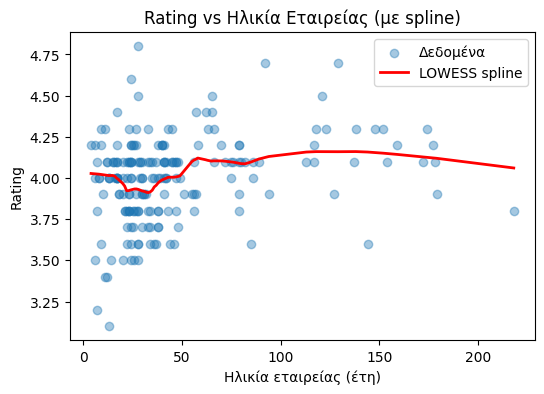

In [79]:
plt.figure(figsize=(6,4))

plt.scatter(
    df_sorted["company_age"],
    df_sorted["rating"],
    alpha=0.4,
    label="Δεδομένα"
)

plt.plot(
    lowess_curve[:, 0],
    lowess_curve[:, 1],
    color="red",
    linewidth=2,
    label="LOWESS spline"
)

plt.xlabel("Ηλικία εταιρείας (έτη)")
plt.ylabel("Rating")
plt.title("Rating vs Ηλικία Εταιρείας (με spline)")
plt.legend()
plt.show()


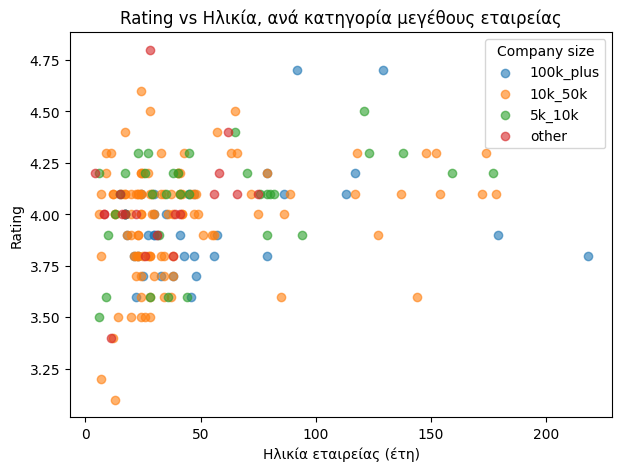

In [81]:
# Scatter + χρώμα = μέγεθος εταιρείας (πολύ ισχυρό)

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

for cat, sub in df_clean.dropna(subset=["company_age"]).groupby("company_size_cat"):
    plt.scatter(
        sub["company_age"],
        sub["rating"],
        alpha=0.6,
        label=cat
    )

plt.xlabel("Ηλικία εταιρείας (έτη)")
plt.ylabel("Rating")
plt.title("Rating vs Ηλικία, ανά κατηγορία μεγέθους εταιρείας")
plt.legend(title="Company size")
plt.show()


In [ ]:
#  ομαδοποηση  - Επιλογή βασικών industries
top_industries = (
    df_clean["industry"]
    .value_counts()
    .head(6)
    .index
)

df_top = df_clean[df_clean["industry"].isin(top_industries)]


<Figure size 800x400 with 0 Axes>

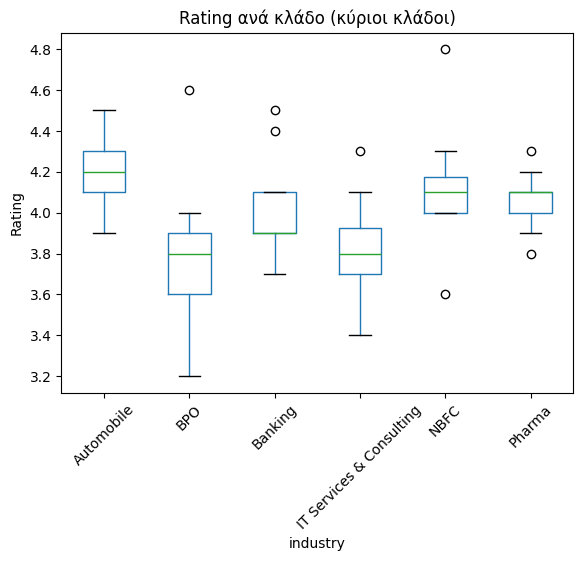

In [88]:
# Industry vs rating (boxplot)

plt.figure(figsize=(8,4))

df_top.boxplot(
    column="rating",
    by="industry",
    grid=False,
    rot=45
)

plt.title("Rating ανά κλάδο (κύριοι κλάδοι)")
plt.suptitle("")
plt.ylabel("Rating")
plt.show()
